In [2]:
input = open("covid19.txt")
lines = [line.rstrip() for line in input]

In [3]:
genome = ''.join(lines[1:])

In [56]:
def pattern_count(text, pattern):
    count = 0
    for i in range(len(text) - len(pattern)):
        if text[i:i+len(pattern)] == pattern:
            count += 1
    return count

def pattern_count_with_idx(text, pattern):
    count = 0
    for i in range(len(text) - len(pattern)):
        if text[i:i+len(pattern)] == pattern:
            print('Found at ' + str(i))
            count += 1
    return count

In [57]:
def freq_words(text, k):
    result = set()
    cnt = []
    
    for i in range(len(text) - k):
        pattern = text[i:i+k]
        cnt.append(pattern_count(text, pattern))
    
    max_cnt = max(cnt)
    
    for i in range(len(text) - k):
        if cnt[i] == max_cnt:
            result.add(text[i:i+k])
            
    return list(result)

def find_and_count(genome, max_k):
    result = []
    for i in range(3, max_k+1):
        s = freq_words(genome, i)[0]
        c = pattern_count(genome, s)
        result.append(s)
        print('String "' + s + '" found ' + str(c) + ' times.')
    return result

In [6]:
def complement(ch):
    if ch == 'A':
        return 'T'
    elif ch == 'T':
        return 'A'
    elif ch == 'C':
        return 'G'
    elif ch == 'G':
        return 'C'

def rev_comp(pattern):
    pattern = ''.join(reversed(pattern))
    return map(complement, pattern)

#### Строим SKEW диаграмму:

In [19]:
def skew(genome):
    s = [0]
    for nucleotide in genome:
        if nucleotide == 'G':
            s.append(s[-1] + 1)
        elif nucleotide == 'C':
            s.append(s[-1] - 1)
        else:
            s.append(s[-1])
    return s

In [11]:
import matplotlib.pyplot
%matplotlib inline

In [20]:
y = skew(genome)
x = range(len(genome)+1)

Text(0, 0.5, 'SKEW')

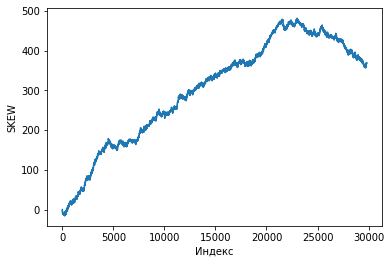

In [22]:
matplotlib.pyplot.plot(x, y)
matplotlib.pyplot.xlabel('Индекс')
matplotlib.pyplot.ylabel('SKEW')

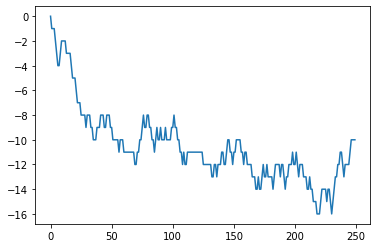

In [27]:
matplotlib.pyplot.plot(x[:250], y[:250])

#### Предполагаем, что oriC находится в окрестности минимума.

In [39]:
frequent_strings = find_and_count(genome[:250], 11)

String "TCT" found 10 times.
String "ATCT" found 5 times.
String "GGCTG" found 3 times.
String "TGCTTA" found 2 times.
String "AACCAAC" found 2 times.
String "GTTTCGTC" found 2 times.
String "TTTCGTCCG" found 2 times.
String "GGTTTCGTCC" found 2 times.
String "GGTTTCGTCCG" found 2 times.


#### Проверим, встречаются ли k-меры, обратно-комплементарные k-мерам выше (в этом же боксе)?

In [55]:
list(map(lambda p: pattern_count(genome[:250], list(p)), list(map(rev_comp, frequent_strings))))

[0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Не нашлось ни одного.

In [59]:
def hamming_dst(text1, text2):
    dst = 0
    for i in range(len(text1)):
        if text1[i] != text2[i]:
            dst += 1
    return dst

def approx_pattern_count(text, pattern, d):
    count = 0
    for i in range(len(text) - len(pattern)):
        if hamming_dst(text[i:i+len(pattern)], pattern) <= d:
            count += 1
    return count

#### Попробуем допускать ошибки (не более 1).

In [61]:
list(map(lambda p: approx_pattern_count(genome[:250], p, 1), frequent_strings))

[49, 16, 4, 2, 4, 2, 2, 2, 2]

#### Увеличилось число 7-меров AACCAAC (с 3 до 4), остальные k-меры, k >= 7, не встретились чаще.

In [66]:
list(map(lambda p: approx_pattern_count(genome[:250], list(p), 1), list(map(rev_comp, frequent_strings))))

[30, 8, 4, 1, 0, 0, 0, 0, 0]

#### k-меры (k >= 7), являющиеся обратно-комплементарными и допускающими ошибку в 1 по Хэммингу, не стали встречаться чаще. Таким образом, претенденты следующие:

String "AACCAAC" found 2 times.

String "GTTTCGTC" found 2 times.

String "TTTCGTCCG" found 2 times.

String "GGTTTCGTCC" found 2 times.

String "GGTTTCGTCCG" found 2 times.

Мы знаем, что для бактерий следует искать 9-мер, но что мы можем сказать про вирусы?..